In [ ]:
#import data to workspace

#set working environment packages
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd


#opening file into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
df = pd.read_csv(citibikedata)
df.head()

In [2]:
# df is the dataframe where the content of the csv file is stored

df1 = df.drop(df.columns[3:11],axis=1)
df1.head()
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 


,tripduration,starttime,stoptime,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,15400,Subscriber,1989.0,1


In [3]:
#df is the dataframe where the content of the csv file is stored
df1['ageM'] = 2016 - df1['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df1['ageF'] = 2016 - df1['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df1['ageM'].dropna(inplace= True)
df1['ageF'].dropna(inplace= True)
df1.head()

,tripduration,starttime,stoptime,bikeid,usertype,birth year,gender,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,19859,Subscriber,1972.0,1,44.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,16233,Subscriber,1967.0,1,49.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,22397,Subscriber,1989.0,1,27.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,16231,Subscriber,1991.0,1,25.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,15400,Subscriber,1989.0,1,27.0,NaN


Populating the interactive namespace from numpy and matplotlib


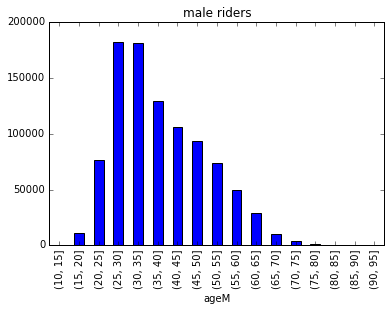

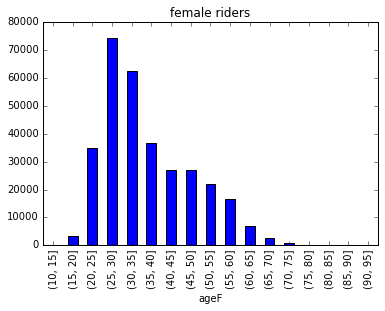

In [4]:
import numpy as np
import pylab as pl
%pylab inline

bins = np.arange(10, 99, 5)
axM = df1.ageM.groupby(pd.cut(df1.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df1.ageF.groupby(pd.cut(df1.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001804
(20, 25]       0.028723
(25, 30]       0.072360
(30, 35]       0.080015
(35, 40]       0.059895
(40, 45]       0.034306
(45, 50]       0.021237
(50, 55]       0.013730
(55, 60]       0.013854
(60, 65]       0.005400
(65, 70]       0.002165
(70, 75]       0.000173
(75, 80]       0.000019
(80, 85]       0.000061
(85, 90]       0.000010
(90, 95]       0.000000


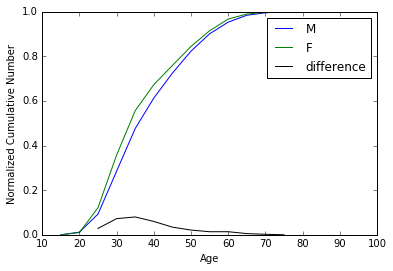

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df1.ageM.groupby(pd.cut(df1.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df1.ageF.groupby(pd.cut(df1.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

    CORRELATION TEST

In [6]:
import scipy.stats
import math

ks = scipy.stats.ks_2samp(df1.ageM, df1.ageF)

rej = ks[0] - 1.36 * math.sqrt(((len(df1.ageM))+len(df1.ageF))/(len(df1.ageM)*len(df1.ageF)))
print ks

if rej > 0:
    print 'Reject null hypothesis.'
else:
    print 'Do not reject null hypothesis.'

Ks_2sampResult(statistic=0.082706883585128677, pvalue=0.0)
Reject null hypothesis.


## The KS test returns the ks statistics.
null hypothesis: 2 independent samples age of Males and age of females are drawn from the same continuous distribution.

In [7]:
print len(df1.ageF.dropna())
print len(df1.ageF)
print len(df1.ageM)
print len(df1.ageM.dropna())
df1.head()

314575
314575
947425
947425


,tripduration,starttime,stoptime,bikeid,usertype,birth year,gender,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,19859,Subscriber,1972.0,1,44.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,16233,Subscriber,1967.0,1,49.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,22397,Subscriber,1989.0,1,27.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,16231,Subscriber,1991.0,1,25.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,15400,Subscriber,1989.0,1,27.0,NaN


In [9]:
arr = np.arange(0,len(df1), 199)

In [10]:
ageM_rand = df1.ageM[arr]
ageF_rand = df1.ageF[arr]
ks2 = scipy.stats.ks_2samp(ageM_rand, ageF_rand)

In [46]:
#sort the dataframe
ageM_sort = df1.ageM.sort_values()
ageF_sort = df1.ageF.sort_values()
#print len(ageM_sort), len(ageF_sort)
#print ageM_sort
#print ageM_sort.iloc[0:22]
#print len(ageM_sort.dropna()), len(ageF_sort.dropna())
ageM_sort.head(10)

308706     16.0
289911     16.0
1134272    16.0
703014     16.0
1378010    16.0
1314714    16.0
240530     16.0
542944     16.0
979652     16.0
1314636    16.0
Name: ageM, dtype: float64

In [51]:
#manipulate ageM_sort and ageF_sort into the same length.
arr2 = np.linspace(0, len(ageM_sort)-1, num = len(ageF_sort)).astype(int)

ageM_sort2 = ageM_sort[ageM_sort.index[arr2].values]
#ageM_sort2
#len(ageM_sort2) == len(ageF_sort)
#print len(ageM_sort2.dropna())

In [52]:
scipy.stats.pearsonr(ageF_sort, ageM_sort2)

(0.99594073531514005, 0.0)

## Scipy stats returns he pearson correlation coefficient of 0.99594073531514005 and p-value 0.0.